In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
merch = pd.read_csv('../data/raw/merchants.csv')

In [5]:
print(os.listdir('../data/raw'))

['historical_transactions.csv', 'merchants.csv', 'new_merchant_transactions.csv', 'sample_submission.csv', 'Data_Dictionary.xlsx', 'test.csv', '.gitkeep', 'train.csv']


In [2]:
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')
ht = pd.read_csv('../data/raw/historical_transactions.csv')
merch = pd.read_csv('../data/raw/merchants.csv')
merch_tr = pd.read_csv('../data/raw/new_merchant_transactions.csv')

In [11]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [38]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [15]:
# commmon card ids between test and train - none
# duplicate card in train/test
# ditribution of feature_1, 2, 3
# corelation between feature_1, 2, 3
# corelation between feature_1, 2, 3 and target

In [41]:
train.shape

(201917, 6)

In [43]:
test.shape

(123623, 5)

In [45]:
sum(test.card_id.isin(train.card_id))

0

In [47]:
sum(train.card_id.isin(test.card_id))

0

In [52]:
test[test.card_id == 'C_ID_92a2005557']

,first_active_month,card_id,feature_1,feature_2,feature_3


In [57]:
sum(train.groupby('card_id').size() > 1)

0

In [62]:
sum(test.groupby('card_id').size() > 1)

0

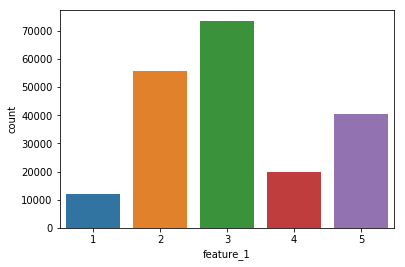

In [67]:
sns.countplot(train.feature_1)

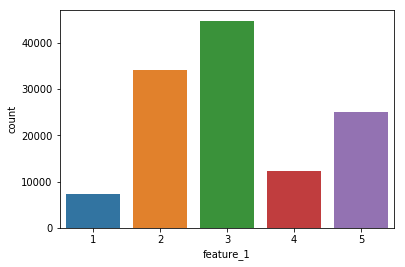

In [68]:
sns.countplot(test.feature_1)

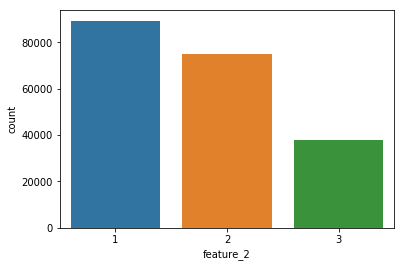

In [69]:
sns.countplot(train.feature_2)

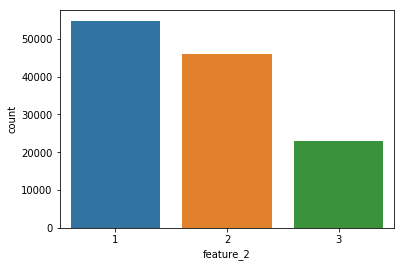

In [70]:
sns.countplot(test.feature_2)

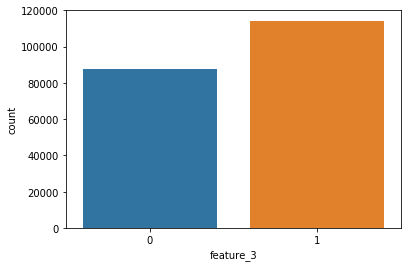

In [71]:
sns.countplot(train.feature_3)

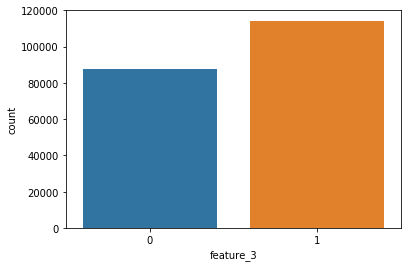

In [73]:
sns.countplot(train.feature_3)

In [77]:
train.target.describe()
# mean is different from median -- outliars ??

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

/home/neha/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


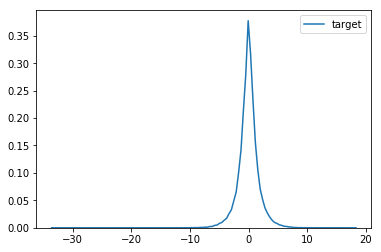

In [78]:
sns.kdeplot(train.target)

In [3]:
train.target.describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

In [26]:
train.target.quantile([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.85])

0.01   -33.219281
0.02    -5.016077
0.03    -4.063205
0.04    -3.493656
0.05    -3.107836
0.06    -2.808085
0.07    -2.562565
0.08    -2.362260
0.85     1.345208
Name: target, dtype: float64

In [13]:
sum(train.target > 1)/201917

0.2025584769979744

In [21]:
train[train.target < -30].target

64       -33.219281
92       -33.219281
125      -33.219281
151      -33.219281
225      -33.219281
248      -33.219281
254      -33.219281
386      -33.219281
467      -33.219281
515      -33.219281
566      -33.219281
578      -33.219281
687      -33.219281
761      -33.219281
810      -33.219281
840      -33.219281
922      -33.219281
925      -33.219281
1005     -33.219281
1092     -33.219281
1153     -33.219281
1571     -33.219281
1574     -33.219281
1601     -33.219281
1769     -33.219281
1849     -33.219281
1893     -33.219281
1909     -33.219281
1969     -33.219281
1974     -33.219281
            ...    
199349   -33.219281
199453   -33.219281
199480   -33.219281
199504   -33.219281
199549   -33.219281
199748   -33.219281
199767   -33.219281
199810   -33.219281
199892   -33.219281
200029   -33.219281
200115   -33.219281
200208   -33.219281
200250   -33.219281
200311   -33.219281
200381   -33.219281
200426   -33.219281
200474   -33.219281
200534   -33.219281
200652   -33.219281


In [22]:
2207/201917

0.010930233709890698

# Merchant

In [2]:
merch.head(1).T.reset_index().sort_values(by=merch.head(1).T.reset_index().columns[0])

,index,0
17,active_months_lag12,12
11,active_months_lag3,3
14,active_months_lag6,6
16,avg_purchases_lag12,13.9167
10,avg_purchases_lag3,9.66667
13,avg_purchases_lag6,18.6667
15,avg_sales_lag12,-2.32
9,avg_sales_lag3,-0.4
12,avg_sales_lag6,-2.25
6,category_1,N


In [26]:
sum(merch.groupby('merchant_id').size() >1 )
# how to handle this ?

0

In [21]:
dups = merch.groupby('merchant_id').size().reset_index()
dups.columns = ['merchant_id', 'cnt']

In [22]:
dup_merch = dups[dups.cnt>1].merchant_id

In [23]:
dup_merch.shape

(41,)

In [24]:
merch[merch.merchant_id.isin(dup_merch)]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
53,M_ID_c0b712e11a,35,823,25,-0.057471,-0.057471,N,E,E,1.00,...,1.00,1.000000,1,1.00,1.000000,1,N,231,9,1.0
54,M_ID_c0b712e11a,35,823,25,-0.007896,-0.007896,N,E,E,1.01,...,1.01,1.097119,6,1.20,1.190741,12,N,231,9,1.0
111,M_ID_0039220eb3,35,836,5,-0.057471,-0.057471,Y,E,E,0.66,...,0.66,0.666667,3,0.66,0.666667,3,Y,-1,-1,NaN
112,M_ID_0039220eb3,35,836,5,0.408530,0.408530,Y,C,D,1.17,...,1.17,1.087939,6,1.19,0.997021,12,Y,-1,-1,NaN
3392,M_ID_bd49e37dda,35,692,21,-0.057471,-0.057471,N,E,E,60.09,...,104.82,13.800000,5,104.82,13.800000,5,N,51,16,1.0
3393,M_ID_bd49e37dda,4170,692,21,-0.057471,-0.057471,N,E,E,60.09,...,104.82,13.800000,5,104.82,13.800000,5,N,51,16,1.0
3394,M_ID_bd49e37dda,35,692,21,-0.057471,-0.057471,N,D,E,1.35,...,1.23,1.546667,6,1.23,1.546667,6,N,51,16,1.0
3395,M_ID_bd49e37dda,4170,692,21,-0.057471,-0.057471,N,D,E,1.35,...,1.23,1.546667,6,1.23,1.546667,6,N,51,16,1.0
4181,M_ID_ef233cff26,35,560,34,-0.047556,-0.057471,N,E,E,322.44,...,817.53,162.055556,6,778.20,149.592593,9,Y,69,9,1.0
4182,M_ID_ef233cff26,28799,560,34,-0.047556,-0.057471,N,E,E,322.44,...,817.53,162.055556,6,778.20,149.592593,9,Y,69,9,1.0


In [25]:
merch = merch.drop_duplicates(subset='merchant_id')

In [29]:
merch.shape
#(334633, 22)


(334696, 22)

In [30]:
334696-334633

63

# new_merchant_transactions

In [34]:
merch_tr.head(1).T.reset_index().sort_values(by=merch_tr.head(1).T.reset_index().columns[0])

,index,0
0,authorized_flag,Y
1,card_id,C_ID_415bb3a509
3,category_1,N
11,category_2,1
5,category_3,B
2,city_id,107
4,installments,1
6,merchant_category_id,307
7,merchant_id,M_ID_b0c793002c
8,month_lag,1


# historical_transactions

In [82]:
ht.head(1).T.reset_index().sort_values(by=ht.head(1).T.reset_index().columns[0])

,index,0
0,authorized_flag,Y
1,card_id,C_ID_4e6213e9bc
3,category_1,N
11,category_2,1
5,category_3,A
2,city_id,88
4,installments,0
6,merchant_category_id,80
7,merchant_id,M_ID_e020e9b302
8,month_lag,-8


In [87]:
merch[merch.merchant_id == 'M_ID_e020e9b302'].T

,334495
merchant_id,M_ID_e020e9b302
merchant_group_id,35
merchant_category_id,80
subsector_id,37
numerical_1,23.4706
numerical_2,23.0145
category_1,N
most_recent_sales_range,A
most_recent_purchases_range,A
avg_sales_lag3,1.08


In [92]:
ht[ht.card_id == 'C_ID_d639edf6cd'].sort_values(by=['merchant_id', 'purchase_date'])

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
20593108,Y,C_ID_d639edf6cd,69,N,0,A,511,M_ID_00a6ca8a8a,-12,-0.710829,2017-02-15 21:09:05,1.0,9,7
20593098,Y,C_ID_d639edf6cd,233,N,0,A,705,M_ID_14275fe7b9,-13,-0.719860,2017-01-11 16:30:18,1.0,9,33
20593117,Y,C_ID_d639edf6cd,143,N,0,A,705,M_ID_17511eed62,-12,-0.711746,2017-02-20 13:04:10,5.0,5,33
20593095,Y,C_ID_d639edf6cd,143,N,0,A,705,M_ID_17511eed62,-11,-0.714676,2017-03-08 15:47:51,5.0,5,33
20593122,Y,C_ID_d639edf6cd,143,N,0,A,705,M_ID_17511eed62,-11,-0.667898,2017-03-27 15:59:15,5.0,5,33
20593123,Y,C_ID_d639edf6cd,143,N,0,A,80,M_ID_1bd1f2e1c0,-11,-0.727524,2017-03-03 16:15:40,5.0,5,37
20593129,Y,C_ID_d639edf6cd,143,N,0,A,80,M_ID_522bd82b6f,-13,-0.694465,2017-01-27 22:14:29,5.0,5,37
20593124,Y,C_ID_d639edf6cd,143,N,0,A,705,M_ID_5634fd83e0,-13,-0.632796,2017-01-13 19:27:23,5.0,5,33
20593102,Y,C_ID_d639edf6cd,143,N,0,A,705,M_ID_5634fd83e0,-12,-0.673578,2017-02-20 19:13:49,5.0,5,33
20593121,N,C_ID_d639edf6cd,143,N,0,A,705,M_ID_5634fd83e0,-12,-0.637515,2017-02-23 19:32:09,5.0,5,33


In [93]:
ht.purchase_date.min()

'2017-01-01 00:00:08'

In [95]:
ht.purchase_date.max()

'2018-02-28 23:59:51'

In [97]:
merch_tr.purchase_date.min()

'2017-03-01 03:24:51'

In [98]:
merch_tr.purchase_date.max()

'2018-04-30 23:59:59'

In [99]:
lags = ht.groupby(['card_id', 'merchant_id'])['month_lag'].agg(['min', 'max'])

In [101]:
lags = lags.reset_index()

In [102]:
lags[lags.card_id == 'C_ID_d639edf6cd']

,card_id,merchant_id,min,max
9180257,C_ID_d639edf6cd,M_ID_00a6ca8a8a,-12,-12
9180258,C_ID_d639edf6cd,M_ID_14275fe7b9,-13,-13
9180259,C_ID_d639edf6cd,M_ID_17511eed62,-12,-11
9180260,C_ID_d639edf6cd,M_ID_1bd1f2e1c0,-11,-11
9180261,C_ID_d639edf6cd,M_ID_522bd82b6f,-13,-13
9180262,C_ID_d639edf6cd,M_ID_5634fd83e0,-13,-2
9180263,C_ID_d639edf6cd,M_ID_59cd66d017,-1,-1
9180264,C_ID_d639edf6cd,M_ID_68c75b8804,-12,-12
9180265,C_ID_d639edf6cd,M_ID_a1ae0e9738,-1,-1
9180266,C_ID_d639edf6cd,M_ID_ba54afc107,-13,-13


In [103]:
lags['range'] = lags['max'] - lags['min']

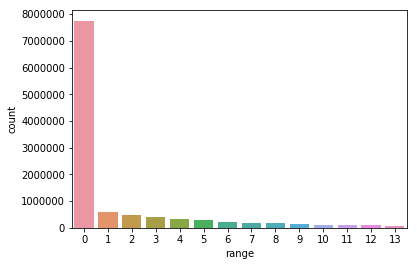

In [105]:
sns.countplot(lags.range)

In [106]:
list(ht.columns)

['authorized_flag',
 'card_id',
 'city_id',
 'category_1',
 'installments',
 'category_3',
 'merchant_category_id',
 'merchant_id',
 'month_lag',
 'purchase_amount',
 'purchase_date',
 'category_2',
 'state_id',
 'subsector_id']

In [107]:
ht.authorized_flag.unique()

array(['Y', 'N'], dtype=object)

In [110]:
'authorized'  ['authorized_flag', 'category_1'] 

False

In [120]:
ht_gg = pd.read_csv('../data/processed/train_transactions_agg.csv')

In [118]:
[col for col in train.columns if col not in ['first_active_month', 'card_id']]

['feature_1', 'feature_2', 'feature_3', 'target']

In [123]:
ht_gg['hist_purchase_date_min'].head(10)

0    1.498573e+09
1    1.483720e+09
2    1.484123e+09
3    1.506443e+09
4    1.510445e+09
5    1.484068e+09
6    1.483619e+09
7    1.506634e+09
8    1.503073e+09
9    1.483978e+09
Name: hist_purchase_date_min, dtype: float64

In [29]:
aggs = {
 		'merchant_id': ['nunique'],
        'merchant_category_id': ['nunique'],
        'state_id': ['nunique'],
        'city_id': ['nunique'],
        'subsector_id': ['nunique'],
        'purchase_amount': ['sum', 'mean', 'max', 'min', 'std'],
        'installments': ['sum', 'mean', 'max', 'min', 'std']                                 
    }
transactions_by_lag = ht.groupby(['card_id', 'month_lag']).agg(aggs)
transactions_by_lag.columns = ['_'.join(col).strip() for col in transactions_by_lag.columns.values]


In [31]:
transactions_by_lag = transactions_by_lag.reset_index()

In [34]:
transactions_by_lag.head()

,card_id,month_lag,merchant_id_nunique,merchant_category_id_nunique,state_id_nunique,city_id_nunique,subsector_id_nunique,purchase_amount_sum,purchase_amount_mean,purchase_amount_max,purchase_amount_min,purchase_amount_std,installments_sum,installments_mean,installments_max,installments_min,installments_std
0,C_ID_00007093c1,-12,3,2,1,1,2,-1.334414,-0.333604,0.037176,-0.572600,0.266149,7,1.750000,3,1,0.957427
1,C_ID_00007093c1,-11,2,2,1,1,2,-5.712629,-0.571263,-0.401298,-0.677936,0.085455,10,1.000000,1,1,0.000000
2,C_ID_00007093c1,-10,5,3,2,2,3,-6.508689,-0.542391,0.004418,-0.728876,0.217579,12,1.000000,1,1,0.000000
3,C_ID_00007093c1,-9,4,4,1,1,4,-3.425248,-0.342525,0.307953,-0.698823,0.402503,10,1.000000,1,1,0.000000
4,C_ID_00007093c1,-8,9,8,2,3,7,-9.868677,-0.519404,0.004418,-0.728876,0.208464,29,1.526316,3,1,0.841191


In [38]:
transactions_by_lag = transactions_by_lag.pivot(index='card_id', columns='month_lag')

KeyError: 'card_id'

In [42]:
transactions_by_lag.columns =[col[0]+'_'+str(col[1]) for col in transactions_by_lag.columns.values]

In [45]:
transactions_by_lag.reset_index().head()

,card_id,merchant_id_nunique_-13,merchant_id_nunique_-12,merchant_id_nunique_-11,merchant_id_nunique_-10,merchant_id_nunique_-9,merchant_id_nunique_-8,merchant_id_nunique_-7,merchant_id_nunique_-6,merchant_id_nunique_-5,...,installments_std_-9,installments_std_-8,installments_std_-7,installments_std_-6,installments_std_-5,installments_std_-4,installments_std_-3,installments_std_-2,installments_std_-1,installments_std_0
0,C_ID_00007093c1,NaN,3.0,2.0,5.0,4.0,9.0,9.0,8.0,4.0,...,0.0,0.841191,0.258199,0.795206,1.095445,0.242536,2.000000,0.778499,0.000000,1.164500
1,C_ID_0001238066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,1.414214,1.009050,0.845822,2.149446,1.293772,0.769670
2,C_ID_0001506ef0,2.0,5.0,8.0,NaN,1.0,2.0,1.0,2.0,2.0,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248
3,C_ID_0001793786,NaN,NaN,NaN,NaN,2.0,6.0,11.0,19.0,4.0,...,0.0,0.000000,0.000000,0.182574,0.000000,0.229243,0.000000,0.238833,0.000000,0.000000
4,C_ID_000183fdda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,15.0,...,NaN,NaN,NaN,2.366432,2.009178,1.004988,3.041381,2.023326,2.383808,2.387135


In [6]:
ht[ht.month_lag == 0].purchase_date.head(30)

5      2018-02-24 08:45:05
11     2018-02-08 20:05:45
16     2018-02-07 12:19:33
25     2018-02-26 14:54:38
30     2018-02-27 09:04:48
43     2018-02-24 10:52:32
54     2018-02-23 12:07:51
59     2018-02-09 12:18:56
64     2018-02-15 17:08:31
72     2018-02-18 14:15:17
80     2018-02-23 09:20:59
82     2018-02-25 12:07:37
88     2018-02-06 08:19:03
95     2018-02-04 13:43:21
133    2018-02-22 12:20:50
134    2018-02-20 10:58:17
138    2018-02-06 21:06:22
140    2018-02-26 12:55:44
152    2018-02-06 12:17:59
153    2018-02-10 12:30:44
157    2018-02-12 10:02:35
159    2018-02-06 12:00:39
161    2018-02-17 12:28:52
165    2018-02-21 19:06:20
167    2018-02-08 11:56:38
168    2018-02-20 10:57:50
189    2018-02-28 17:00:08
192    2018-02-17 10:49:42
194    2018-02-15 18:56:38
208    2018-02-22 16:56:36
Name: purchase_date, dtype: object

In [8]:
pd.DatetimeIndex(ht['purchase_date'].head(10)).astype(np.int64) * 1e-9

Float64Index([1498404787.0, 1500120645.0, 1502316269.0, 1504346786.0,
              1489108459.0, 1519461905.0, 1490055051.0, 1511035555.0,
              1496354576.0, 1489678882.0],
             dtype='float64', name='purchase_date')

In [9]:
ht['purchase_date'].head(10)

0    2017-06-25 15:33:07
1    2017-07-15 12:10:45
2    2017-08-09 22:04:29
3    2017-09-02 10:06:26
4    2017-03-10 01:14:19
5    2018-02-24 08:45:05
6    2017-03-21 00:10:51
7    2017-11-18 20:05:55
8    2017-06-01 22:02:56
9    2017-03-16 15:41:22
Name: purchase_date, dtype: object